In [2]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import pandas_profiling
import numpy as np
import re
import requests
from IPython.display import display
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
import types

%load_ext autoreload
%autoreload 2
 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
acsgc = pd.read_csv('ACSG_crime_merged.csv', index_col=0) 
acsgc.head()


,GeoType,NTA,GeoID,Borough,Pop_1E,MaleEN,FemEN,PopUnd18N,PopOv65N,HispN,...,FELONY,MISDEMEANOR,VIOLATION,TOTAL_CRIME,Population,GardenCounts_y,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm,TOTAL_CRIME_norm
0,NTA2010,Bath Beach,BK27,Brooklyn,33163,0.503151,0.496849,0.214184,0.147393,0.176733,...,996.0,2177.0,479.0,3652.0,33163.0,0.0,0.030033,0.065645,0.014444,0.110123
1,NTA2010,Bay Ridge,BK31,Brooklyn,79134,0.478037,0.521963,0.190942,0.156444,0.178608,...,2661.0,6493.0,1886.0,11040.0,79134.0,0.0,0.033627,0.082051,0.023833,0.139510
2,NTA2010,Bedford,BK75,Brooklyn,75318,0.484492,0.515508,0.297127,0.077219,0.194933,...,6178.0,9390.0,2485.0,18053.0,75318.0,23.0,0.082026,0.124671,0.032993,0.239690
3,NTA2010,Bensonhurst East,BK29,Brooklyn,64267,0.486766,0.513234,0.198749,0.157266,0.123283,...,1888.0,3085.0,962.0,5935.0,64267.0,1.0,0.029377,0.048003,0.014969,0.092349
4,NTA2010,Bensonhurst West,BK28,Brooklyn,91646,0.487212,0.512788,0.210462,0.142625,0.145975,...,2539.0,4214.0,1201.0,7954.0,91646.0,2.0,0.027704,0.045981,0.013105,0.086790


In [4]:
acsgc.shape

(195, 56)

In [5]:
acsgc.columns

Index(['GeoType', 'NTA', 'GeoID', 'Borough', 'Pop_1E', 'MaleEN', 'FemEN',
       'PopUnd18N', 'PopOv65N', 'HispN', 'NotHispN', 'WhiteN', 'BlackN',
       'NativeN', 'AsianN', 'PacificN', 'OtherRace1N', 'OtherRace2N', 'HHPop',
       'HHINC_U10N', 'HHINC_10t14N', 'HHINC_15t24N', 'HHINC_25t34N',
       'HHINC_35t49N', 'HHINC_50t74N', 'HHINC_75t99N', 'HHINC_100t149N',
       'HHINC_150t199N', 'HHINC_200plN', 'Pop16yrsOver', 'Labor_forceN',
       'CivilianLF', 'CLF_UnemployedN', 'PopOver25', 'EduOtherN',
       'EduBachelor', 'EduGradProf', 'GardenCounts_x', 'HasGarden',
       'GardenNorm', 'Inc_low', 'Inc_mid', 'Inc_high', 'Race_other',
       'Asian_other', 'ntaname', 'FELONY', 'MISDEMEANOR', 'VIOLATION',
       'TOTAL_CRIME', 'Population', 'GardenCounts_y', 'FELONY_norm',
       'MISDEMEANOR_norm', 'VIOLATION_norm', 'TOTAL_CRIME_norm'],
      dtype='object')

In [ ]:
# Find percentage of missing values.
(acsgc.isnull().sum().sort_index()/len(acsgc))

In [6]:
# Find percentage of missing values.
acsgc.isnull().sum()

GeoType             0
NTA                 0
GeoID               0
Borough             0
Pop_1E              0
MaleEN              2
FemEN               2
PopUnd18N           2
PopOv65N            2
HispN               2
NotHispN            2
WhiteN              2
BlackN              2
NativeN             2
AsianN              2
PacificN            2
OtherRace1N         2
OtherRace2N         2
HHPop               0
HHINC_U10N          4
HHINC_10t14N        4
HHINC_15t24N        4
HHINC_25t34N        4
HHINC_35t49N        4
HHINC_50t74N        4
HHINC_75t99N        4
HHINC_100t149N      4
HHINC_150t199N      4
HHINC_200plN        4
Pop16yrsOver        0
Labor_forceN        2
CivilianLF          0
CLF_UnemployedN     3
PopOver25           0
EduOtherN           2
EduBachelor         2
EduGradProf         2
GardenCounts_x      0
HasGarden           0
GardenNorm          0
Inc_low             4
Inc_mid             4
Inc_high            4
Race_other          2
Asian_other         2
ntaname   

In [12]:
pandas_profiling.ProfileReport(acsgc)

In [7]:
#select features for decision tree / random forest model

rf = acsgc[['NTA','MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN',
       'EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high',
           'FELONY_norm',
       'MISDEMEANOR_norm', 'VIOLATION_norm','HasGarden']].copy()

In [8]:
rf.head()

,NTA,MaleEN,FemEN,PopOv65N,HispN,WhiteN,BlackN,Asian_other,CLF_UnemployedN,EduOtherN,EduBachelor,EduGradProf,Inc_low,Inc_mid,Inc_high,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm,HasGarden
0,Bath Beach,0.503151,0.496849,0.147393,0.176733,0.436933,0.012182,0.374152,0.070566,0.663798,0.224372,0.111829,0.433409,0.299790,0.266801,0.030033,0.065645,0.014444,0
1,Bay Ridge,0.478037,0.521963,0.156444,0.178608,0.634329,0.019094,0.167968,0.074922,0.535735,0.271976,0.192289,0.409413,0.289008,0.301580,0.033627,0.082051,0.023833,0
2,Bedford,0.484492,0.515508,0.077219,0.194933,0.350607,0.405826,0.048634,0.125027,0.678193,0.204352,0.117455,0.575924,0.229287,0.194789,0.082026,0.124671,0.032993,1
3,Bensonhurst East,0.486766,0.513234,0.157266,0.123283,0.465153,0.008262,0.403302,0.085202,0.698153,0.204564,0.097283,0.510524,0.290981,0.198495,0.029377,0.048003,0.014969,1
4,Bensonhurst West,0.487212,0.512788,0.142625,0.145975,0.426773,0.008740,0.418513,0.088342,0.737618,0.188800,0.073582,0.492862,0.285700,0.221438,0.027704,0.045981,0.013105,1


In [9]:
rf = rf.replace([np.inf, -np.inf, np.nan], 0)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
feature_cols = ['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 
                'Inc_high','FELONY_norm','MISDEMEANOR_norm', 'VIOLATION_norm']

X=rf[['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high',
           'FELONY_norm','MISDEMEANOR_norm', 'VIOLATION_norm']]  # Features

y=rf['HasGarden']  # Labels

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [13]:
corr = X.corr()
corr

,MaleEN,FemEN,PopOv65N,HispN,WhiteN,BlackN,Asian_other,CLF_UnemployedN,EduOtherN,EduBachelor,EduGradProf,Inc_low,Inc_mid,Inc_high,FELONY_norm,MISDEMEANOR_norm,VIOLATION_norm
MaleEN,1.000000,-0.006060,-0.017339,0.146840,0.109487,-0.040818,0.120378,0.243101,0.324633,0.052903,-0.003366,-0.029464,0.068945,0.052775,0.281273,0.254223,0.260199
FemEN,-0.006060,1.000000,0.392044,0.045129,0.064279,0.159980,0.031216,0.040128,0.146749,0.247246,0.189288,0.411656,0.514437,0.202791,-0.226264,-0.201524,-0.188336
PopOv65N,-0.017339,0.392044,1.000000,-0.413753,0.457420,-0.169209,0.198705,-0.223653,-0.180832,0.291193,0.348424,-0.170876,0.312350,0.369154,-0.048126,-0.033866,-0.099716
HispN,0.146840,0.045129,-0.413753,1.000000,-0.546927,-0.044034,-0.231161,0.418896,0.533652,-0.470721,-0.472539,0.632231,-0.122579,-0.578870,-0.027111,-0.010950,0.007045
WhiteN,0.109487,0.064279,0.457420,-0.546927,1.000000,-0.614807,0.031027,-0.493426,-0.590723,0.654779,0.665785,-0.516700,0.055019,0.713176,0.055591,0.059785,0.030554
BlackN,-0.040818,0.159980,-0.169209,-0.044034,-0.614807,1.000000,-0.405770,0.401948,0.395499,-0.369210,-0.344067,0.239361,0.033740,-0.329919,0.019004,0.004340,0.038969
Asian_other,0.120378,0.031216,0.198705,-0.231161,0.031027,-0.405770,1.000000,-0.213165,-0.096719,0.210650,0.098518,-0.147933,0.290984,0.168743,-0.073267,-0.079852,-0.099500
CLF_UnemployedN,0.243101,0.040128,-0.223653,0.418896,-0.493426,0.401948,-0.213165,1.000000,0.540112,-0.433614,-0.457196,0.468106,-0.189300,-0.550593,0.032649,0.045633,0.134177
EduOtherN,0.324633,0.146749,-0.180832,0.533652,-0.590723,0.395499,-0.096719,0.540112,1.000000,-0.819481,-0.865374,0.663569,0.150348,-0.718360,-0.016971,-0.014716,0.004097
EduBachelor,0.052903,0.247246,0.291193,-0.470721,0.654779,-0.369210,0.210650,-0.433614,-0.819481,1.000000,0.883933,-0.510275,0.150863,0.811213,0.048346,0.043795,0.050488


In [14]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (136, 17) (136,)
Testing set:  (59, 17) (59,)


In [15]:
#Building Decision Tree Model

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, y_train)

#max depth = 2 to control for overfitting

In [16]:
#Predict the response for test dataset
yhat = dtc.predict(X_test)

In [17]:
#Evaluate Model:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.75
Test set Accuracy:  0.559322033898305


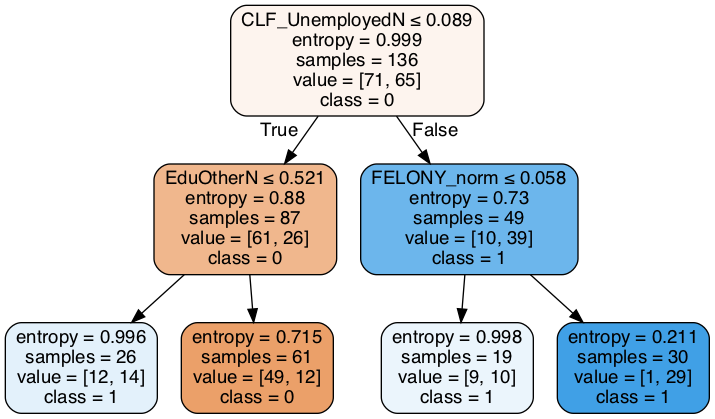

In [19]:
#visualizing decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gardens.png')
Image(graph.create_png())

[[14 16]
 [10 19]]


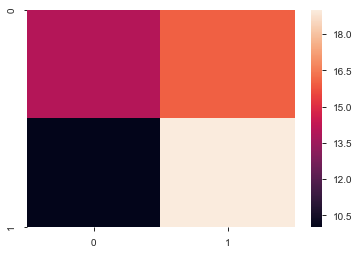

In [20]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, yhat)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [38]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 20,min_samples_leaf = 5)

#rf_clf = RandomForestClassifier(n_estimators=100 , max_depth=25, min_samples_split = 2, min_samples_leaf = 2 )

rfc = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 5).fit(X_train, y_train)


In [39]:
# Fit your model on the features (X) and the target (y)

yhatRF = rfc.predict(X_test)

In [40]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))

Train set Accuracy:  0.8970588235294118
Test set Accuracy:  0.6440677966101694


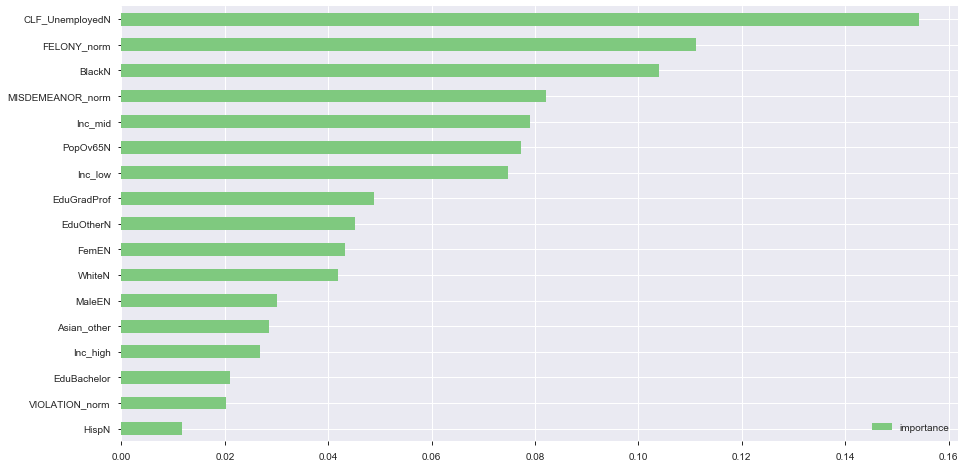

In [41]:
df_feat_importance = pd.DataFrame({'importance' : rfc.feature_importances_}, index = X.columns)
df_feat_importance.sort_values(by='importance', ascending=True ).plot(kind='barh',colormap ='Accent', figsize=(15,8))

In [42]:
df = pd.DataFrame({'importance' : rfc.feature_importances_}, index = X.columns)
df.sort_values(by='importance', ascending=False )

,importance
CLF_UnemployedN,0.154181
FELONY_norm,0.111116
BlackN,0.104053
MISDEMEANOR_norm,0.082146
Inc_mid,0.078953
PopOv65N,0.077302
Inc_low,0.074727
EduGradProf,0.048855
EduOtherN,0.045178
FemEN,0.043161


In [32]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)
sel.get_support().sum() 

Index(['PopOv65N', 'BlackN', 'CLF_UnemployedN', 'EduOtherN', 'Inc_low',
       'Inc_mid', 'FELONY_norm', 'MISDEMEANOR_norm'],
      dtype='object')


8

In [33]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# cross_val_score(estimator, features, target, chosen scoring method) assigned to the variable "scores."
# scores will be a numpy array
scores = cross_val_score(rfc, X, y, cv=3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# A for loop for running a Random Forest Classifier with n-estimators (or number of trees in your forest).
# The is 1 to 100 in steps of 10 - range(start, end, step)
for n_trees in range(1, 100, 10):
    rfc = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(rfc, X, y, cv=3, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.58547794 0.54933586 0.7688172 ], Average AUC 0.634543669618385
n trees: 1, CV AUC [0.50183824 0.4288425  0.64076246], Average AUC 0.5238144011270197
n trees: 11, CV AUC [0.57490809 0.44734345 0.72043011], Average AUC 0.5808938830908709
n trees: 21, CV AUC [0.56479779 0.5256167  0.72434018], Average AUC 0.6049182227876487
n trees: 31, CV AUC [0.49540441 0.44354839 0.81524927], Average AUC 0.5847340219078835
n trees: 41, CV AUC [0.55928309 0.49905123 0.73851417], Average AUC 0.5989494985433078
n trees: 51, CV AUC [0.56571691 0.51185958 0.76392962], Average AUC 0.613835371025243
n trees: 61, CV AUC [0.56571691 0.55645161 0.73167155], Average AUC 0.6179466929733769
n trees: 71, CV AUC [0.55744485 0.51850095 0.71554252], Average AUC 0.5971627745673049
n trees: 81, CV AUC [0.52435662 0.53842505 0.7086999 ], Average AUC 0.5904938557778928
n trees: 91, CV AUC [0.52849265 0.49857685 0.7228739 ], Average AUC 0.5833144658156518


In [ ]:
# Trying WITHOUT CRIME data

In [43]:
rf1 = acsgc[['NTA','MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN',
       'EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high',
           'HasGarden']].copy()

In [44]:
rf1 = rf1.replace([np.inf, -np.inf, np.nan], 0)

In [47]:
feature_cols1 = ['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 
                'Inc_high']

X1=rf1[['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high']]  # Features

y1=rf1['HasGarden']  # Labels

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)

In [49]:
print('Training set: ', X1_train.shape, y1_train.shape)
print('Testing set: ', X1_test.shape, y1_test.shape)

Training set:  (136, 14) (136,)
Testing set:  (59, 14) (59,)


In [50]:
#Building Decision Tree Model

# Create Decision Tree classifer object
dtc1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X1_train, y1_train)

#max depth = 2 to control for overfitting

In [51]:
#Predict the response for test dataset
yhat1 = dtc1.predict(X1_test)

In [52]:
print('Train set Accuracy: ', metrics.accuracy_score(y1_train, dtc1.predict(X1_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y1_test, yhat1))

Train set Accuracy:  0.75
Test set Accuracy:  0.559322033898305


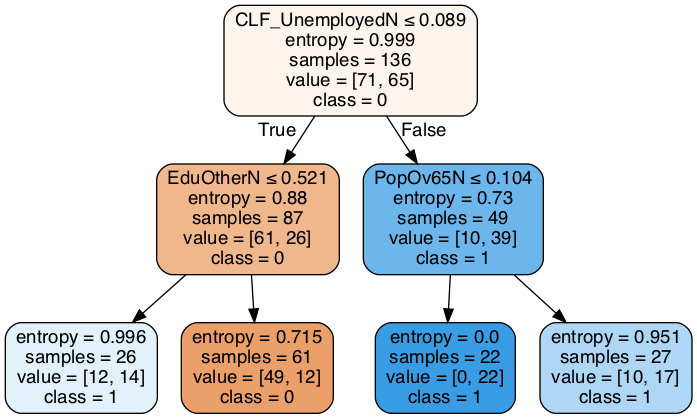

In [54]:
#visualizing decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gardens.png')
Image(graph.create_png())

[[14 16]
 [10 19]]


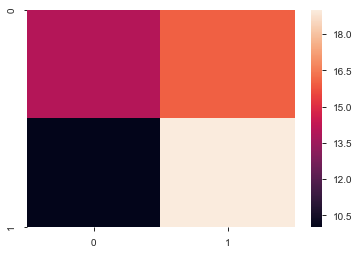

In [57]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix

CM1 = confusion_matrix(y1_test, yhat1)
print(CM1)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM1)
plt.show()

In [58]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 20,min_samples_leaf = 5)

#rf_clf = RandomForestClassifier(n_estimators=100 , max_depth=25, min_samples_split = 2, min_samples_leaf = 2 )

rfc1 = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 5).fit(X1_train, y1_train)


In [59]:
# Fit your model on the features (X) and the target (y)

yhatRF1 = rfc1.predict(X1_test)

In [61]:
print('Train set Accuracy: ', metrics.accuracy_score(y1_train, rfc1.predict(X1_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y1_test, yhatRF1))

Train set Accuracy:  0.8897058823529411
Test set Accuracy:  0.711864406779661


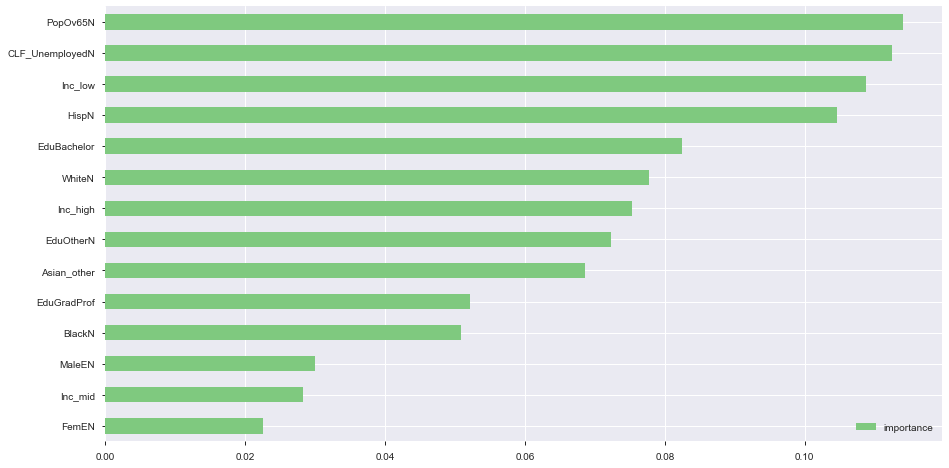

In [62]:
df_feat_importance = pd.DataFrame({'importance' : rfc1.feature_importances_}, index = X1.columns)
df_feat_importance.sort_values(by='importance', ascending=True ).plot(kind='barh',colormap ='Accent', figsize=(15,8))

In [63]:
df = pd.DataFrame({'importance' : rfc1.feature_importances_}, index = X1.columns)
df.sort_values(by='importance', ascending=False)

,importance
PopOv65N,0.113997
CLF_UnemployedN,0.112500
Inc_low,0.108787
HispN,0.104606
EduBachelor,0.082389
WhiteN,0.077745
Inc_high,0.075298
EduOtherN,0.072322
Asian_other,0.068566
EduGradProf,0.052129
